In [143]:
import keras
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Setting seed for reproducability
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation


In [144]:
# Pembacaan data training

dt_train = pd.read_csv("[Dataset]_Train_(Perawatan-Pesawat).csv")
dt_train = dt_train.sort_values(['id','cycle'])
dt_train.head()




,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [145]:
#Pembacaan ground truth data 
truth_df = pd.read_csv('truth.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)

In [146]:
# Pembacaan data test
dt_test = pd.read_csv("[Dataset]_Test_(Perawatan-Pesawat).csv")
dt_test = dt_test.sort_values(['id','cycle'])

In [147]:
# # Pembuatan kolom RUL
# rul = pd.DataFrame(dt_train.groupby('id')['cycle'].max()).reset_index()
# rul.columns = ['id', 'max']
# dt_train = dt_train.merge(rul, on=['id'], how='left')
# dt_train['RUL'] = dt_train['max'] - dt_train['cycle']
# dt_train.drop('max', axis=1, inplace=True)
# dt_train.head()
# Pembuatan kolom label untuk data training
w1 = 30
w0 = 15
dt_train['label_bnc'] = np.where(dt_train['ttf'] <= w1, 1, 0 )
dt_train['label_mcc'] = dt_train['label_bnc']
dt_train.loc[dt_train['ttf'] <= w0, 'label_mcc'] = 2
dt_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


Dikarenakan kolor RUL(ttf) dan kolom label untuk data training sudah ada, maka part dari kode diatas tidak diperlukan

In [148]:
w1 = 30
w0 = 15
dt_test['label_bnc'] = np.where(dt_test['ttf'] <= w1, 1, 0 )
dt_test['label_mcc'] = dt_test['label_bnc']
dt_test.loc[dt_test['ttf'] <= w0, 'label_mcc'] = 2
dt_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


In [149]:
# MinMax normalization
dt_train['cycle_norm'] = dt_train['cycle']
cols_normalize = dt_train.columns.difference(['id','cycle','ttf','label_bnc','label_mcc'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_dt_train = pd.DataFrame(min_max_scaler.fit_transform(dt_train[cols_normalize]), 
                             columns=cols_normalize, 
                             index=dt_train.index)
dt_join = dt_train[dt_train.columns.difference(cols_normalize)].join(norm_dt_train)
dt_train = dt_join.reindex(columns = dt_train.columns)
dt_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.0,0.000000,0.0,0.0,0.130435,0.017365,190,0,0,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.0,0.408248,0.0,0.0,0.169323,0.237961,189,0,0,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.0,0.353553,0.0,0.0,0.234642,0.202745,188,0,0,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.0,0.387298,0.0,0.0,0.226338,0.178837,187,0,0,0.01108


In [150]:
# MinMax normalization untuk data test
dt_test['cycle_norm'] = dt_test['cycle']
cols_normalize = dt_test.columns.difference(['id','cycle','ttf','label_bnc','label_mcc'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_dt_test = pd.DataFrame(min_max_scaler.fit_transform(dt_test[cols_normalize]), 
                             columns=cols_normalize, 
                             index=dt_test.index)
dt_test_join = dt_test[dt_test.columns.difference(cols_normalize)].join(norm_dt_test)
dt_test = dt_test_join.reindex(columns = dt_test.columns)
dt_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc,cycle_norm
0,1,31,0.392593,0.9,0.0,0.0,0.364035,0.140105,0.245075,0.0,...,0.0,0.476731,0.0,0.0,0.632665,0.062758,112,0,0,0.000000
1,2,49,0.570370,0.4,0.0,0.0,0.350877,0.315480,0.550013,0.0,...,0.0,0.738549,0.0,0.0,0.317462,0.091529,98,0,0,0.066176
2,3,126,0.318519,0.9,0.0,0.0,0.495614,0.418681,0.756204,0.0,...,0.0,0.564076,0.0,0.0,0.746674,0.000000,69,0,0,0.349265
3,4,106,0.525926,0.9,0.0,0.0,0.451754,0.574788,0.448964,0.0,...,0.0,0.904534,0.0,0.0,0.646360,0.022118,82,0,0,0.275735
4,5,98,0.340741,0.1,0.0,0.0,0.228070,0.424886,0.768227,0.0,...,0.0,0.369274,0.0,0.0,0.446137,0.849067,91,0,0,0.246324


In [151]:
# generate column max for test data
ttf = pd.DataFrame(dt_test.groupby('id')['cycle'].max()).reset_index()
ttf.columns = ['id', 'max']
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = ttf['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

In [152]:
# generate ttf for test data
dt_test = dt_test.merge(truth_df, on=['id'], how='left')
dt_test['ttf'] = dt_test['max'] - dt_test['cycle']
dt_test.drop('max', axis=1, inplace=True)
dt_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc,cycle_norm
0,1,31,0.392593,0.9,0.0,0.0,0.364035,0.140105,0.245075,0.0,...,0.0,0.476731,0.0,0.0,0.632665,0.062758,112,0,0,0.000000
1,2,49,0.570370,0.4,0.0,0.0,0.350877,0.315480,0.550013,0.0,...,0.0,0.738549,0.0,0.0,0.317462,0.091529,98,0,0,0.066176
2,3,126,0.318519,0.9,0.0,0.0,0.495614,0.418681,0.756204,0.0,...,0.0,0.564076,0.0,0.0,0.746674,0.000000,69,0,0,0.349265
3,4,106,0.525926,0.9,0.0,0.0,0.451754,0.574788,0.448964,0.0,...,0.0,0.904534,0.0,0.0,0.646360,0.022118,82,0,0,0.275735
4,5,98,0.340741,0.1,0.0,0.0,0.228070,0.424886,0.768227,0.0,...,0.0,0.369274,0.0,0.0,0.446137,0.849067,91,0,0,0.246324


In [153]:
# generate label columns w0 and w1 for test data
dt_test['label_bnc'] = np.where(dt_test['ttf'] <= w1, 1, 0 )
dt_test['label_mmc'] = dt_test['label_bnc']
dt_test.loc[dt_test['ttf'] <= w0, 'label_mmc'] = 2
dt_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc,cycle_norm,label_mmc
0,1,31,0.392593,0.9,0.0,0.0,0.364035,0.140105,0.245075,0.0,...,0.476731,0.0,0.0,0.632665,0.062758,112,0,0,0.000000,0
1,2,49,0.570370,0.4,0.0,0.0,0.350877,0.315480,0.550013,0.0,...,0.738549,0.0,0.0,0.317462,0.091529,98,0,0,0.066176,0
2,3,126,0.318519,0.9,0.0,0.0,0.495614,0.418681,0.756204,0.0,...,0.564076,0.0,0.0,0.746674,0.000000,69,0,0,0.349265,0
3,4,106,0.525926,0.9,0.0,0.0,0.451754,0.574788,0.448964,0.0,...,0.904534,0.0,0.0,0.646360,0.022118,82,0,0,0.275735,0
4,5,98,0.340741,0.1,0.0,0.0,0.228070,0.424886,0.768227,0.0,...,0.369274,0.0,0.0,0.446137,0.849067,91,0,0,0.246324,0


In [154]:
# pick a large window size of 50 cycles
sequence_length = 50

In [155]:
# preparing data for visualizations 
# window of 50 cycles prior to a failure point for engine id 3
engine_id3 = dt_test[dt_test['id'] == 3]
engine_id3_50cycleWindow = engine_id3[engine_id3['ttf'] <= engine_id3['ttf'].min() + 50]
cols1 = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10']
# cols1=['s1']
engine_id3_50cycleWindow1 = engine_id3_50cycleWindow[cols1]
# cols2 = ['s11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
# engine_id3_50cycleWindow2 = engine_id3_50cycleWindow[cols2]

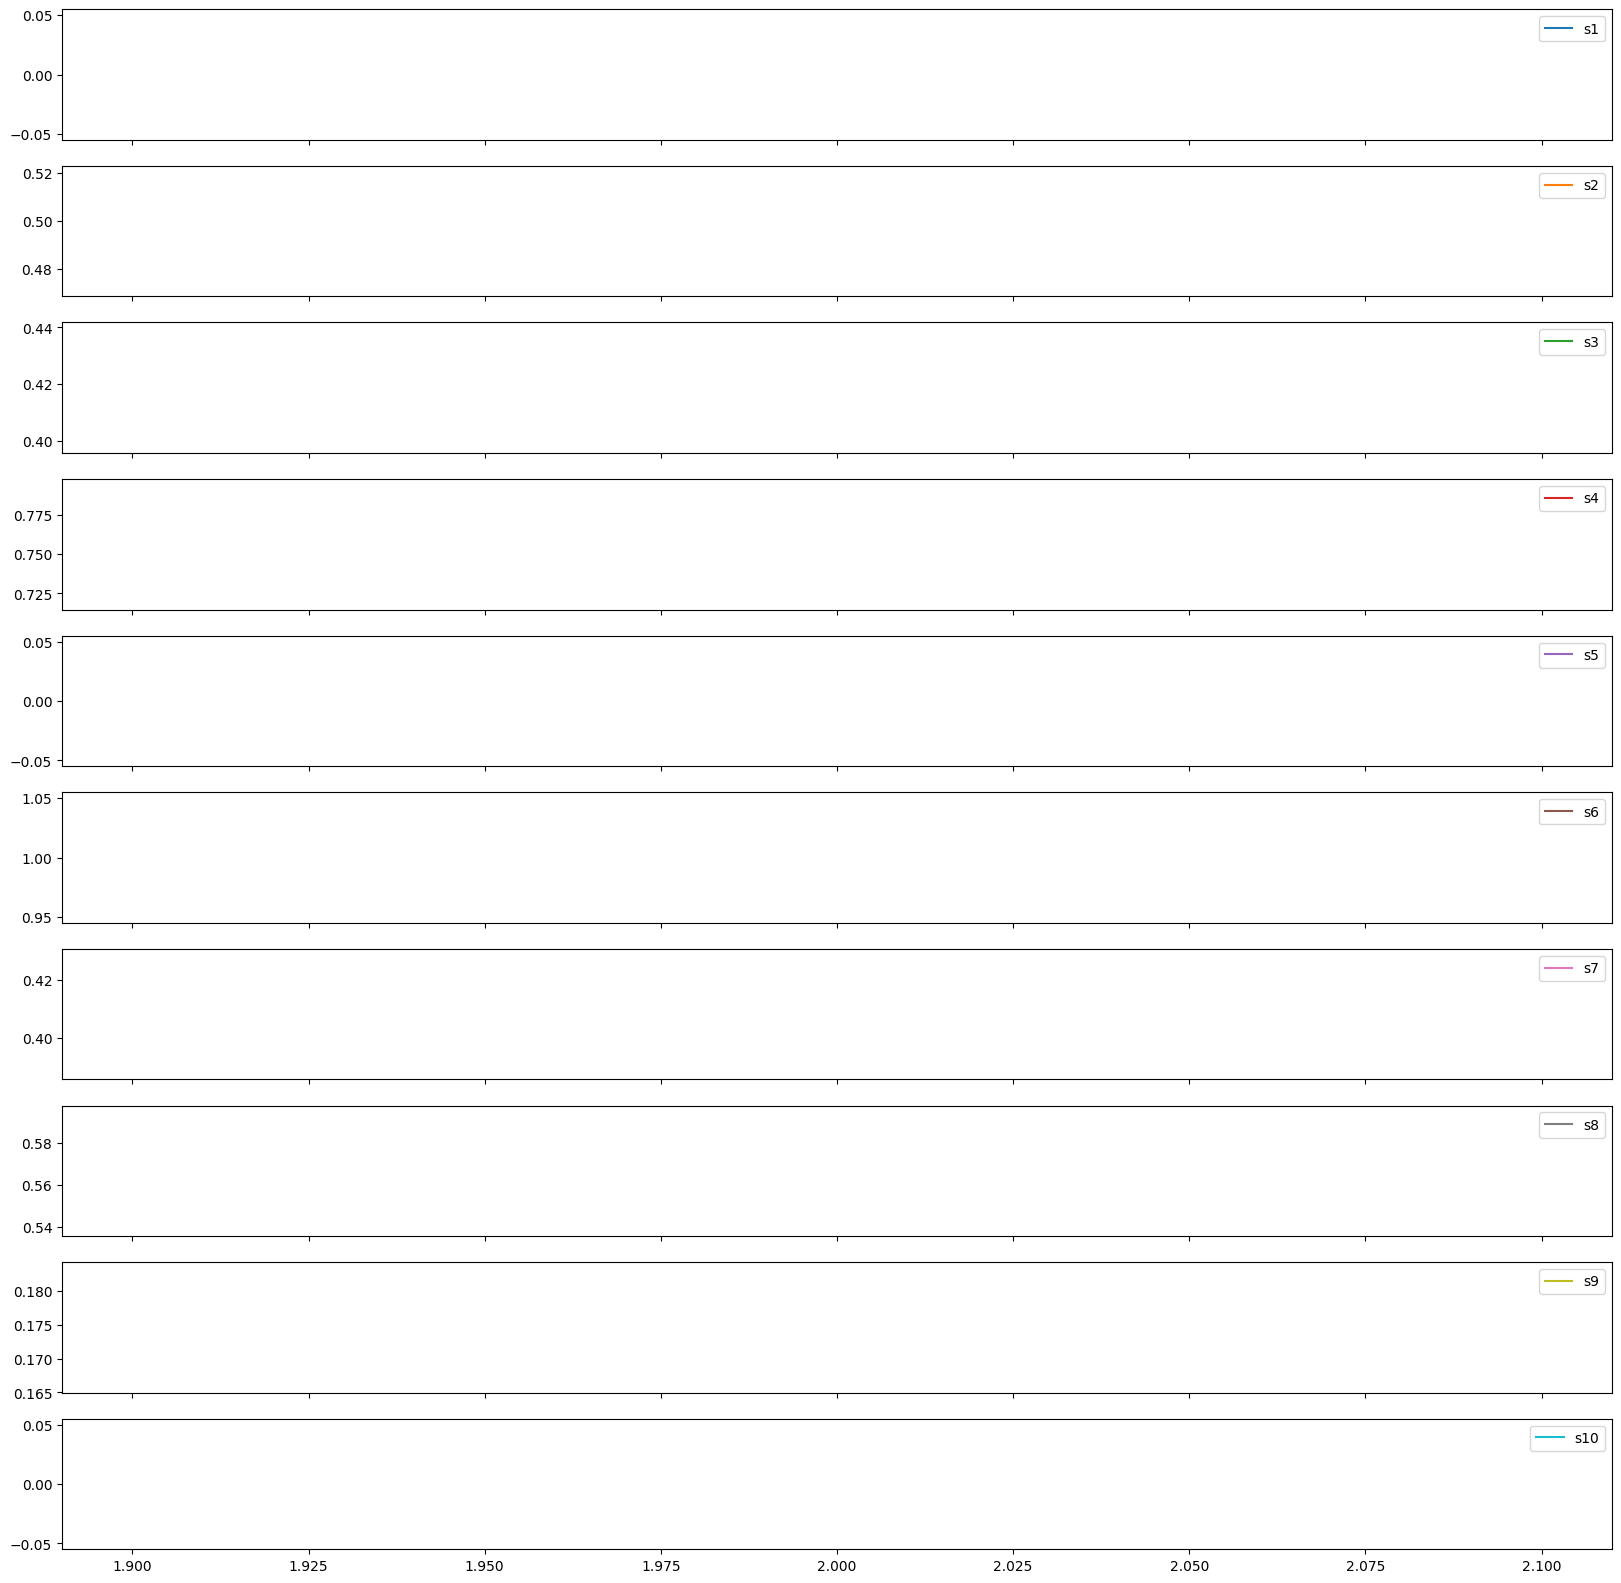

In [156]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 1-10 
ax1 = engine_id3_50cycleWindow1.plot(subplots=True, sharex=True, figsize=(20,20))
